# First PyTorch Neural Network - MNIST Classifier

Make Your First GAN With PyTorch, 2020

In [1]:
from rich import print

## import libraries

In [2]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt

import mnist_data

using cuda: NVIDIA GeForce RTX 3080


## Standard CUDA Check And Set Up

In [3]:
# check if CUDA is available
# if yes, set default tensor type to cuda

if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    print("using cuda:", torch.cuda.get_device_name(0))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

using cuda: NVIDIA GeForce RTX 3080

device(type='cuda')

## Load Data

In [4]:
train_csv = mnist_data.datadir.joinpath('mnist_train.csv')
mnist_dataset = mnist_data.MnistDataset(train_csv)

## Neural Network Class

In [5]:
class Classifier(nn.Module):
    """PyTorch MNIST dataset classifier class.
    """
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, using simple stochastic gradient descent
        # pass the learnable parameters and set learning rate to 0.01
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []
    
    
    def forward(self, inputs):
        """Simply run model to feed signal forward and get outputs.
        """
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        """Train the classifier.
        """
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            
        # zero gradients, perform a backward pass, and update the weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    
    def plot_progress(self):
        """Plot the classifier loss.
        """
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

## Train Neural Network

In [8]:
# create neural network
C = Classifier()

# move neural network to the GPU
if mnist_dataset.device.type == 'cuda':
    print('Move neural network to GPU')
    C.cuda()

Move neural network to the GPU to cuda

In [9]:
%%time

# train network on MNIST data set

epochs = 5

for i in range(epochs):
    print(f'training epoch {i+1} of {epochs}')
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)

training epoch 1 of 5

counter =  10000

counter =  20000

counter =  30000

counter =  40000

counter =  50000

counter =  60000

training epoch 2 of 5

counter =  70000

counter =  80000

counter =  90000

counter =  100000

counter =  110000

counter =  120000

training epoch 3 of 5

counter =  130000

counter =  140000

counter =  150000

counter =  160000

counter =  170000

counter =  180000

training epoch 4 of 5

counter =  190000

counter =  200000

counter =  210000

counter =  220000

counter =  230000

counter =  240000

training epoch 5 of 5

counter =  250000

counter =  260000

counter =  270000

counter =  280000

counter =  290000

counter =  300000

CPU times: user 7min 3s, sys: 15.7 s, total: 7min 19s
Wall time: 7min 34s


## Plot classifier error

<Figure size 1152x576 with 1 Axes>

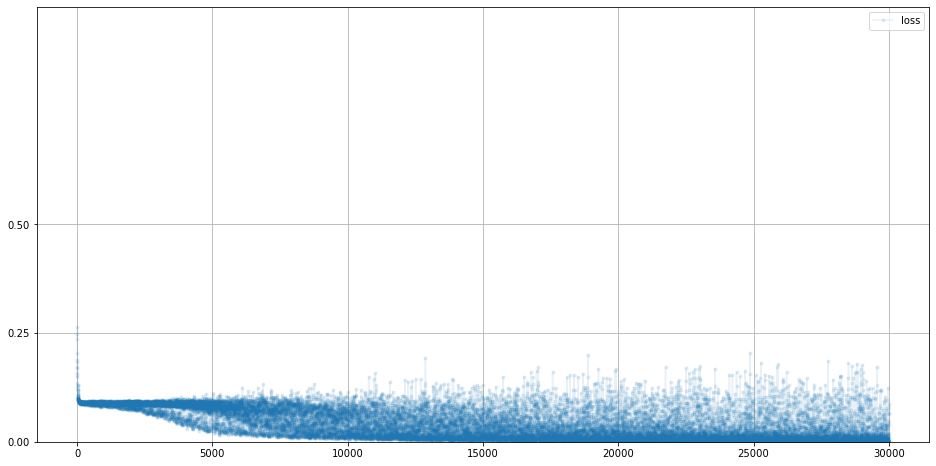

In [10]:
C.plot_progress()

## Classification Example

### load MNIST test data

In [11]:
test_csv = mnist_data.datadir.joinpath("mnist_test.csv")
mnist_test_dataset = mnist_data.MnistDataset(test_csv)

### pick a record

<Figure size 432x288 with 1 Axes>

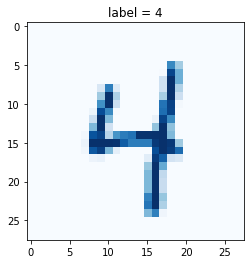

In [12]:
record = 19
mnist_test_dataset.plot_image(record)  # plot image and correct label

### visualise the answer given by the neural network

<AxesSubplot:>

<Figure size 432x288 with 1 Axes>

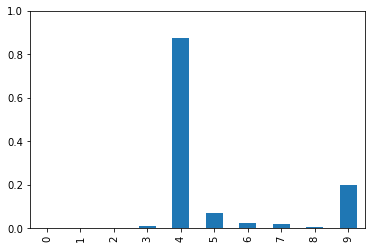

In [13]:
image_data = mnist_test_dataset[record][1]

# query from trained network
output = C.forward(image_data)

if mnist_dataset.device.type == 'cuda':
    output = output.cpu()
    
# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

## Classifier Performance

In [14]:
# test trained neural network on training data

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor)
    if mnist_test_dataset.device.type == 'cuda':
        answer = answer.cpu()
    if (answer.detach().numpy().argmax() == label):
        score += 1
    items += 1

In [15]:
print(f"{score = }, {items = }, {score/items = }")

score = 8883, items = 10000, score/items = 0.8883